In [2]:
%pip install seaborn

     ------------------------------------ 294.9/294.9 kB 958.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')

In [6]:
dataset_path = 'dataset\mental_health_disorder_symptoms_ver2.csv'
df = pd.read_csv(dataset_path)

In [7]:
df.head()

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
0,23,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,MDD
1,14,1,0,1,0,0,1,0,0,1,...,1,1,0,0,0,0,1,0,0,ASD
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
3,29,1,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,bipolar
4,32,1,1,1,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,anexiety


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ag+1:629e                    637 non-null    int64 
 1   feeling.nervous              637 non-null    int64 
 2   panic                        637 non-null    int64 
 3   breathing.rapidly            637 non-null    int64 
 4   sweating                     637 non-null    int64 
 5   trouble.in.concentration     637 non-null    int64 
 6   having.trouble.in.sleeping   637 non-null    int64 
 7   having.trouble.with.work     637 non-null    int64 
 8   hopelessness                 637 non-null    int64 
 9   anger                        637 non-null    int64 
 10  over.react                   637 non-null    int64 
 11  change.in.eating             637 non-null    int64 
 12  suicidal.thought             637 non-null    int64 
 13  feeling.tired                637 no

In [42]:
df = df.rename(columns={'ag+1:629e':'age',
                        'having.trouble.in.sleeping':'trouble.sleeping',
                        'having.trouble.with.work':'trouble.with.work',
                        'having.nightmares':'nightmares'})

df.set_index(['age'])

,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,over.react,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
age,,,,,,,,,,,,,,,,,,,,,
23,1,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,MDD
14,1,0,1,0,0,1,0,0,1,1,...,1,1,0,0,0,0,1,0,0,ASD
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
29,1,0,0,0,1,1,0,0,0,1,...,0,0,0,1,1,0,0,0,1,bipolar
32,1,1,1,1,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,anexiety
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,eating disorder
27,1,0,1,0,0,0,0,1,1,0,...,1,0,1,1,1,0,0,0,0,PDD
19,0,1,0,0,1,0,1,0,0,1,...,0,1,0,1,0,0,1,0,1,ASD


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

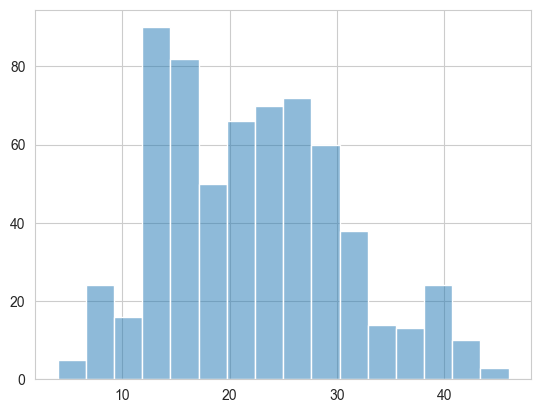

In [48]:
sns.histplot(data=df, x="age", kde=True)

In [7]:
Disorders = df.Disorder.unique()
Disorders

array(['MDD', 'ASD', 'Loneliness', 'bipolar', 'anexiety', 'PTSD',
       'sleeping disorder', 'psychotic deprission', 'eating disorder',
       'ADHD', 'PDD', 'OCD'], dtype=object)

In [8]:
df.Disorder = df.Disorder.str.replace('psychotic deprission', 'psychot depresn')
df.Disorder = df.Disorder.str.replace('sleeping disorder', 'sleep disord')
df.Disorder = df.Disorder.str.replace('anexiety', 'anxiety')
df.Disorder = df.Disorder.str.replace('eating disorder', 'ED')

Disorders = df.Disorder.unique().tolist()

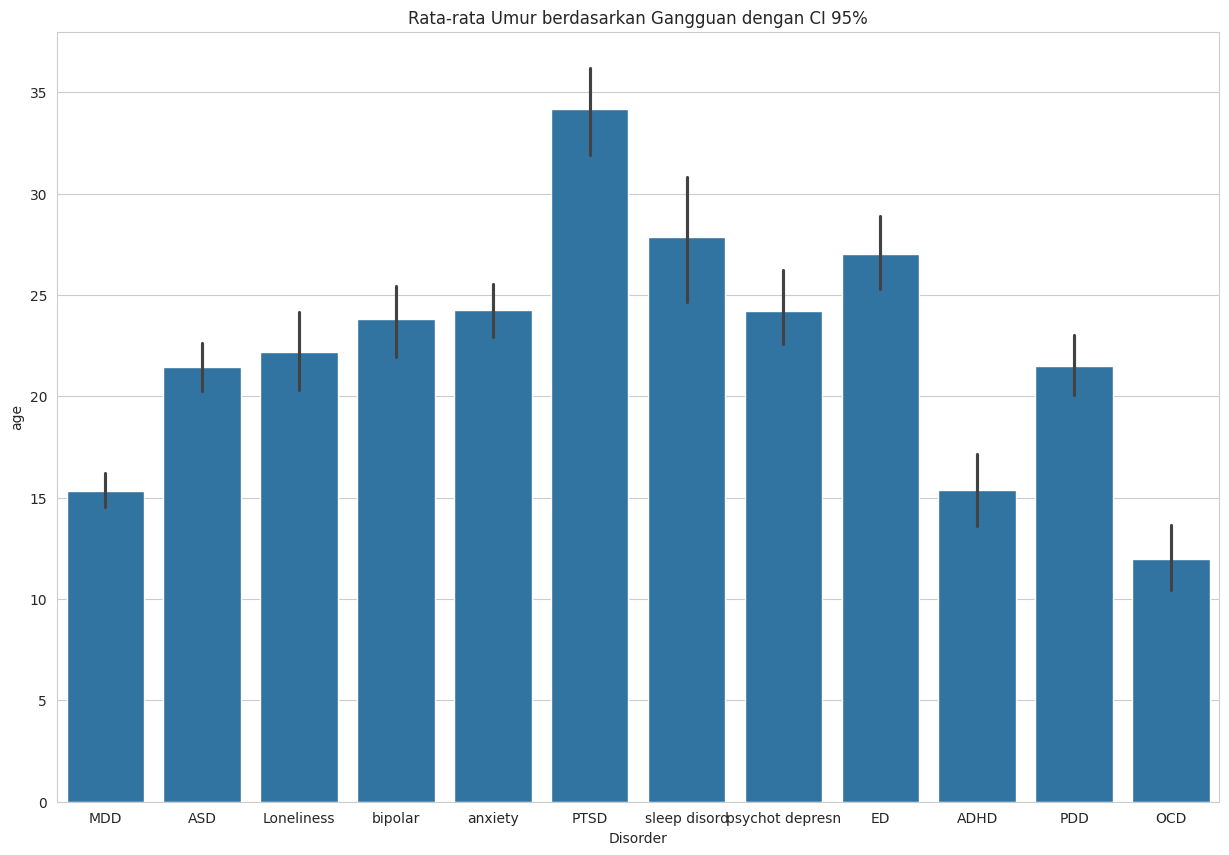

In [9]:
plt.figure(figsize=(15,10))
sns.barplot(data=df, x='Disorder', y='age', estimator=np.mean).set_title('Rata-rata Umur berdasarkan Gangguan dengan CI 95%')
plt.show()

In [10]:
symptom_incidences = df[df.columns[1:27]].sum()

<Axes: title={'center': 'Gejala dari beberapa Gangguan Kesehatan Mental'}>

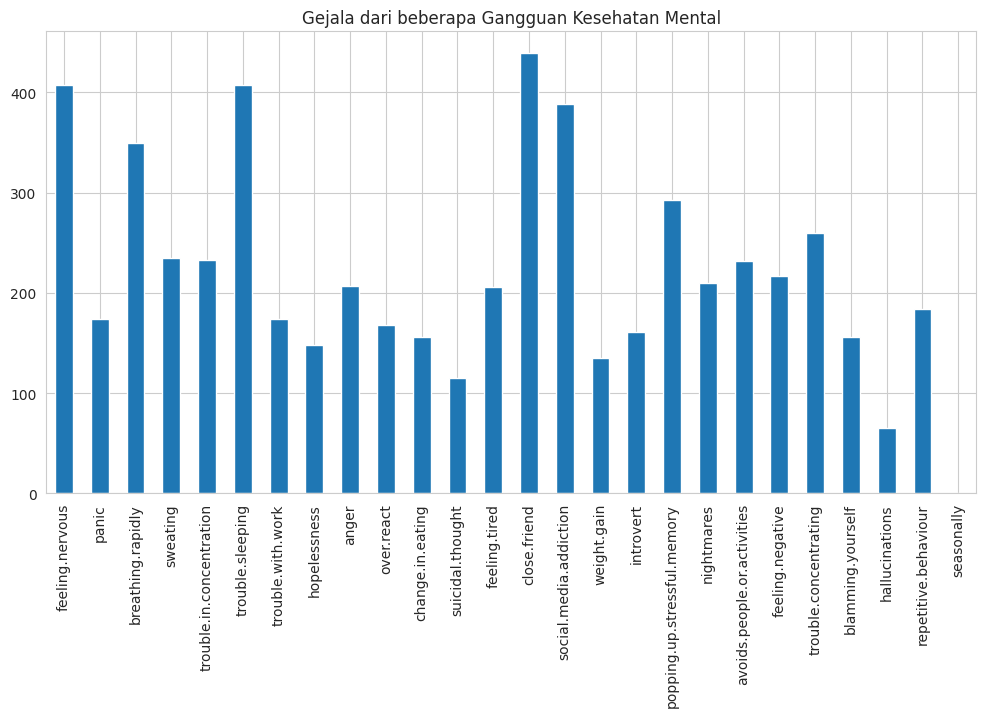

In [12]:
symptom_incidences.plot.bar(figsize=(12,6), title='Gejala dari beberapa Gangguan Kesehatan Mental')

In [14]:
symptoms = list(df.columns)

symptoms.remove('age')
symptoms.remove('Disorder')

df = df.rename({'blamming.yourself':'blaming.yourself'}, axis=1)

<Axes: xlabel='Disorder'>

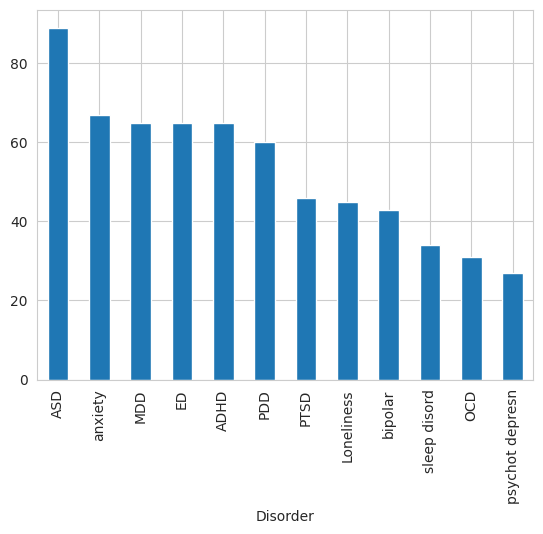

In [15]:
incidences = df.Disorder.value_counts()
incidences.plot.bar()

In [16]:
df[df.isna().any(axis=1)]

,age,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blaming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder


In [17]:
errors = df[(df.iloc[:, 1:27] > 1).any(axis=1)]
errors

,age,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blaming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder


In [18]:
byDisorder = df.groupby('Disorder').sum()
byDisorder.drop('age', axis=1, inplace=True)
byDisorder['incidences'] = incidences
byDisorder

,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,over.react,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blaming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,incidences
Disorder,,,,,,,,,,,,,,,,,,,,,
ADHD,28,0,0,0,65,37,0,0,0,0,...,0,0,0,65,0,0,28,0,65,65
ASD,49,50,60,32,18,50,8,0,71,57,...,71,89,0,18,0,0,83,0,8,89
ED,65,0,65,65,0,0,0,0,0,0,...,0,0,65,0,0,0,0,0,0,65
Loneliness,8,0,0,0,0,0,14,0,0,0,...,0,0,0,0,0,0,0,0,0,45
MDD,28,37,28,41,4,61,41,61,41,41,...,41,4,65,37,17,0,0,0,0,65
OCD,31,0,0,0,3,31,3,0,0,3,...,0,0,0,3,0,3,31,0,31,31
PDD,60,0,60,0,0,11,0,60,49,0,...,49,0,60,49,60,0,0,0,0,60
PTSD,24,43,43,21,46,46,22,0,43,21,...,46,22,0,7,43,26,39,0,0,46
anxiety,67,34,67,67,34,67,34,0,0,0,...,0,67,0,0,0,0,0,0,0,67


In [21]:
d = byDisorder['incidences']
byDisorderRate = byDisorder._append(byDisorder.div(d, axis=0).assign(incidences=d).rename(lambda x: x+' rate'))
byDisorderRate.drop(byDisorderRate.index[0:12], axis=0, inplace=True)
byDisorderRate

,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,trouble.sleeping,trouble.with.work,hopelessness,anger,over.react,...,nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blaming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,incidences
Disorder,,,,,,,,,,,,,,,,,,,,,
ADHD rate,0.430769,0.000000,0.000000,0.000000,1.000000,0.569231,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.430769,0.0,1.000000,65
ASD rate,0.550562,0.561798,0.674157,0.359551,0.202247,0.561798,0.089888,0.000000,0.797753,0.640449,...,0.797753,1.000000,0.0,0.202247,0.000000,0.000000,0.932584,0.0,0.089888,89
ED rate,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,65
Loneliness rate,0.177778,0.000000,0.000000,0.000000,0.000000,0.000000,0.311111,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,45
MDD rate,0.430769,0.569231,0.430769,0.630769,0.061538,0.938462,0.630769,0.938462,0.630769,0.630769,...,0.630769,0.061538,1.0,0.569231,0.261538,0.000000,0.000000,0.0,0.000000,65
OCD rate,1.000000,0.000000,0.000000,0.000000,0.096774,1.000000,0.096774,0.000000,0.000000,0.096774,...,0.000000,0.000000,0.0,0.096774,0.000000,0.096774,1.000000,0.0,1.000000,31
PDD rate,1.000000,0.000000,1.000000,0.000000,0.000000,0.183333,0.000000,1.000000,0.816667,0.000000,...,0.816667,0.000000,1.0,0.816667,1.000000,0.000000,0.000000,0.0,0.000000,60
PTSD rate,0.521739,0.934783,0.934783,0.456522,1.000000,1.000000,0.478261,0.000000,0.934783,0.456522,...,1.000000,0.478261,0.0,0.152174,0.934783,0.565217,0.847826,0.0,0.000000,46
anxiety rate,1.000000,0.507463,1.000000,1.000000,0.507463,1.000000,0.507463,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,67


In [22]:
import plotly
import cufflinks as cf
cf.go_offline()

In [23]:
byDisorderRate.iloc[:, 1:27].iplot(kind='bar', title='Gejala yang berkaitan dengn Gangguan')

In [24]:
byDisorderRate['ADHD':'PTSD'].iloc[:, 1:27].iplot(kind='bar', title='Gejala yang berkaitan dengn Gangguan')

In [25]:
byDisorderRate['PTSD':].iloc[:, 1:27].iplot(kind='bar', title='Gejala yang berkaitan dengn Gangguan')